# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import plotly as py
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score

# 0. 데이터 불러오기

In [ ]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 1. 전처리 및 EDA


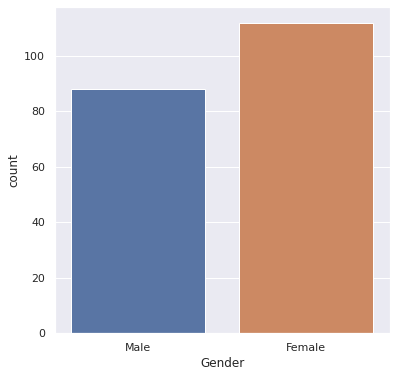

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=df)
plt.show()

여성이 더 많다

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

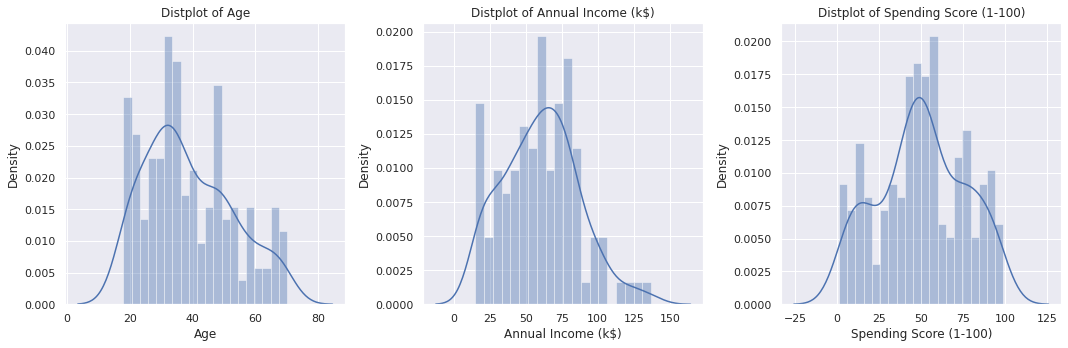

In [ ]:
plt.figure(figsize=(15,5))
n=1
for x in df.iloc[:,1:].columns:
  plt.subplot(1,3,n)
  sns.distplot(df[x], bins=20)
  plt.title('Distplot of {}'.format(x))
  plt.tight_layout()
  n+=1

Age: 30대 중후반이 가장 많고 20대 초반과 50대초반이 많아보인다.\
Annual Income: 60 전후 k$가 가장 많아보이며 그 다음으로 80, 20 전후가 많아보인다.\
Spending Score: 40~60이 가장 많아보인다.

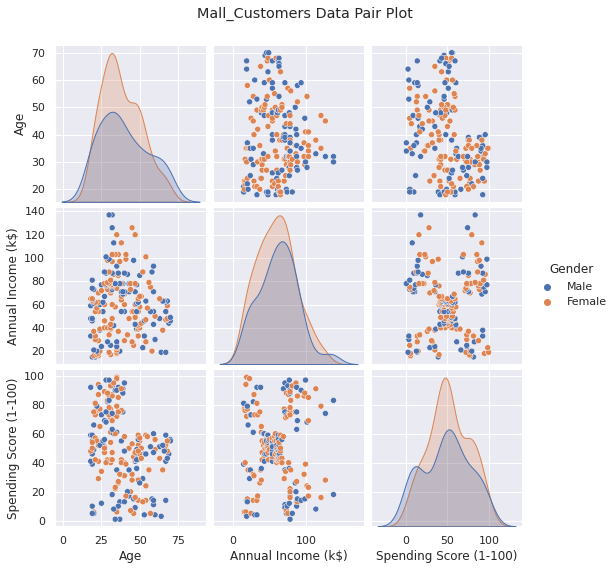

In [ ]:
g=sns.pairplot(df, hue='Gender')
g.fig.suptitle("Mall_Customers Data Pair Plot", y=1.05)
plt.show()

Age: 여성과 남성 모두 30 전후로 가장 많이 분포하며 이때, 여성이 더 많이 분포하고 있다.\
nnual Income: 여성과 남성 모두 약 60k$에 많이 분포하며 이때, 여성이 더 많이 분포하고 있다.\
Spending Score: 여성과 남성 모두 50점에 가장 많이 분포하고 있으며 이때, 여성이 더 많이 분포하고 있다.\
(Annual Income, Spending Score): Annual Income이 40-60일 때, Spending Score은 남녀 모두 40-60 선에서 분포하고 있다.\
(Age, Spending Score): Age가 40 전으로는 남녀 모두 고루 분포하고 있지만 40 이후로는 남녀 모두 Spending Score가 60 보다 큰 데이터가 없다.\
(Age, Annual Income): 고루 분포하지만 Annual Income이 높은 Age는 30-50 선에 분포한다.

In [ ]:
# 수치형 데이터만
df_a=df.iloc[:,1:]

# 단위가 모두 다르기 때문에 표준화 진행
scaler = StandardScaler()
scaled=scaler.fit_transform(df_a)
df_s=pd.DataFrame(scaled, columns=df_a.columns)
df_s

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


#2.Clustering 및 Evaluation

##Hierarchical Clustering

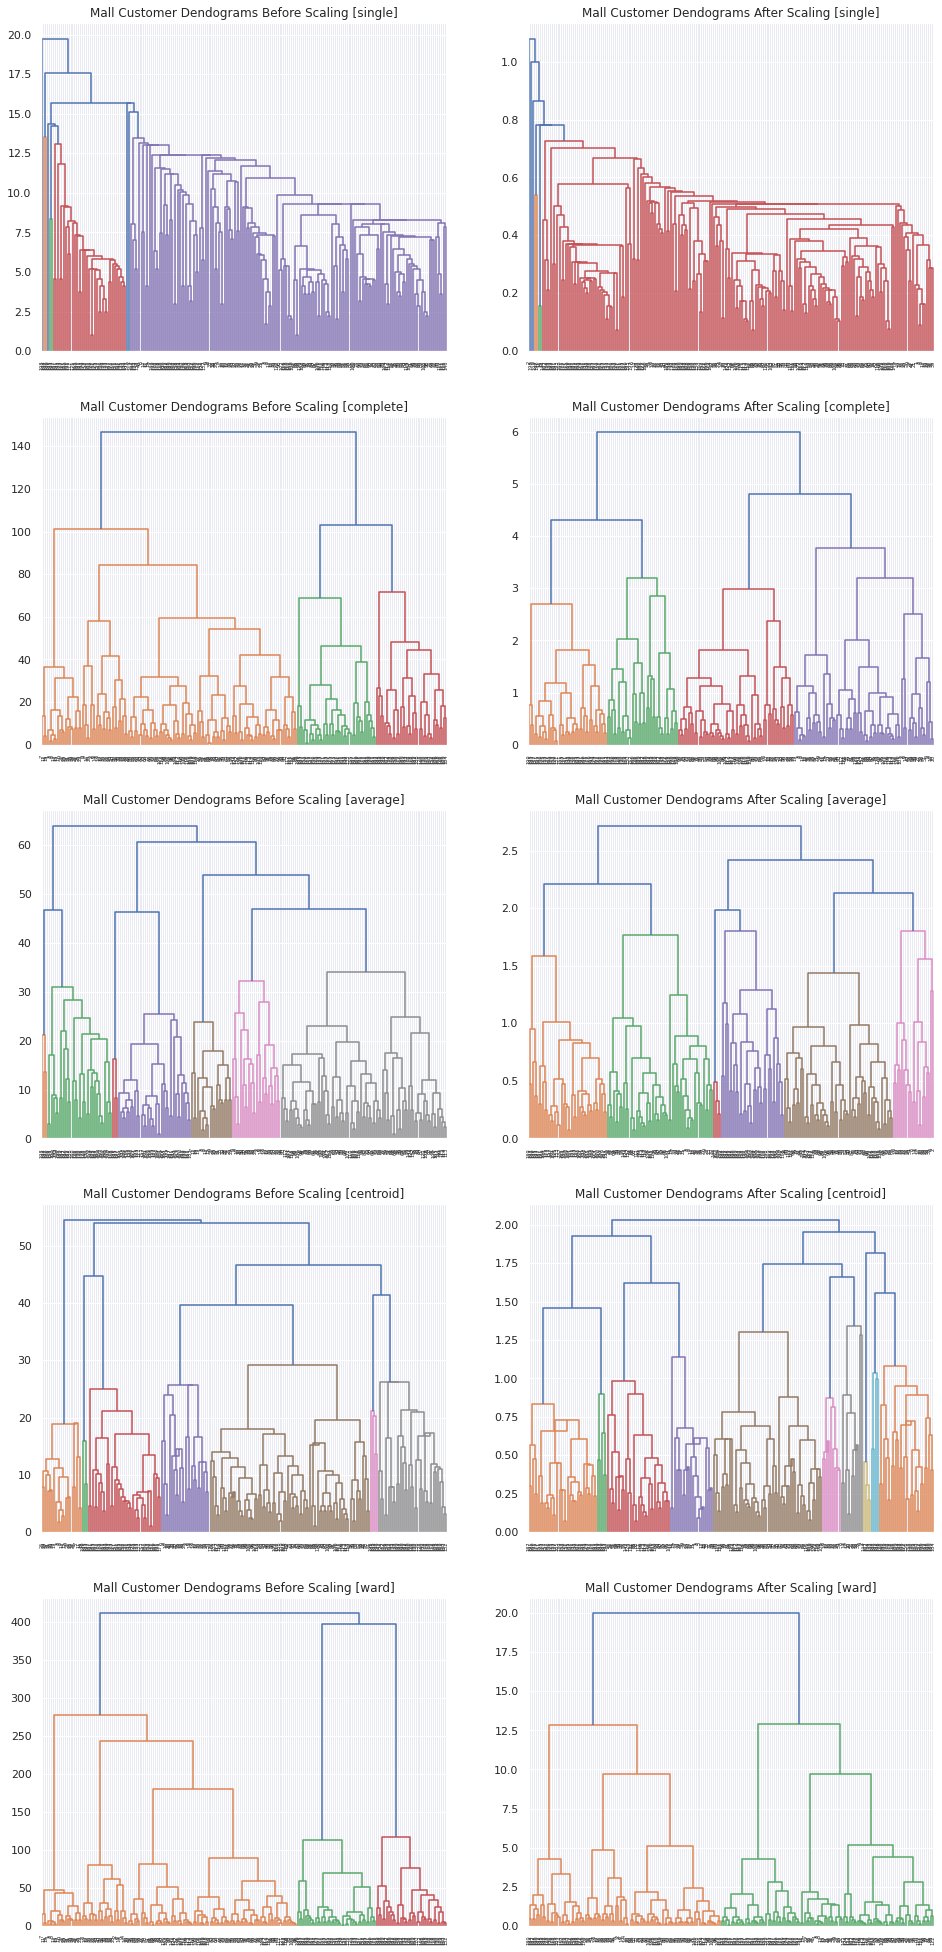

In [ ]:
mod=['single', 'complete', 'average', 'centroid', 'ward'] # ward: 데이터들을 하나의 군집으로 묶음으로써 생기는 정보의 손실 측정
fig, axes = plt.subplots(nrows=len(mod),ncols=2, figsize=(16, 35))

for i in range(len(mod)): 
  axes[i][0].title.set_text("Mall Customer Dendograms Before Scaling ["+mod[i]+']')
  dend_1 = shc.dendrogram(shc.linkage(df_a.values, method=mod[i]), ax=axes[i][0])
  axes[i][1].title.set_text("Mall Customer Dendograms After Scaling ["+mod[i]+']')
  dend_2 = shc.dendrogram(shc.linkage(df_s, method=mod[i]), ax=axes[i][1])
plt.show()

Scaling 후 데이터, method=complete, K=4 \
혹은 Scaling 전 데이터, method=average, K=5가 가장 고루 군집화된 것으로 보임.

In [ ]:
# Scaling 후 데이터, method=complete, K=4
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
h_s=df_s.copy()
labels = agg.fit_predict(h_s)
h_s['Cluster']=labels

In [ ]:
def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 4
        )
     )

trace0 = tracer(h_s, 0, 'Cluster 0')
trace1 = tracer(h_s, 1, 'Cluster 1')
trace2 = tracer(h_s, 2, 'Cluster 2')
trace3 = tracer(h_s, 3, 'Cluster 3')

data = [trace0, trace1, trace2, trace3]

layout = go.Layout(
    title = 'Clusters by Hierarchical Clustering After Scaling',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
silhouette_score(h_s, h_s['Cluster'])

0.517877507412339

In [ ]:
# Scaling 전 데이터, method=average, K=5
agg = AgglomerativeClustering(n_clusters=5, linkage='average')
h=df_a.copy()
label = agg.fit_predict(h)
h['Cluster']=label

In [ ]:
t0 = tracer(h, 0, 'Cluster 0')
t1 = tracer(h, 1, 'Cluster 1')
t2 = tracer(h, 2, 'Cluster 2')
t3 = tracer(h, 3, 'Cluster 3')
t4 = tracer(h, 4, 'Cluster 4')

dt = [t0, t1, t2, t3, t4]

layout = go.Layout(
    title = 'Clusters by Hierarchical Clustering Before Scaling',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=dt, layout=layout)
py.offline.iplot(fig)

In [ ]:
silhouette_score(h, h['Cluster'])

0.4361550129503337

**Scaling 후 데이터, method=complete, K=4가 실루엣 계수가 더 높고 plot상 군집화도 더 잘 되었음**

##K-Means

###Elbow Method

군집 내 편차제곱합(WSS)이 최소가 되도록 군집의 중심을 결정해 나가는 방법

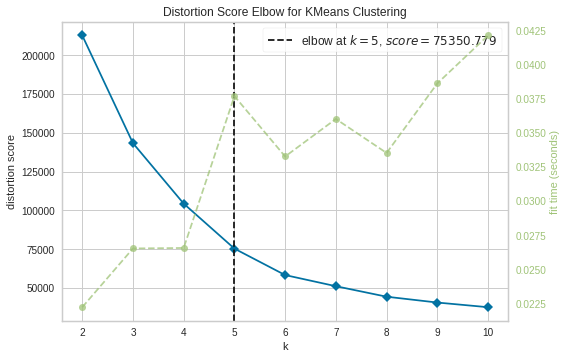

In [ ]:
model = KMeans(random_state=9999)
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(df_a.values)
visualizer.show()
plt.show()

Scaling 전: 최적 K=5

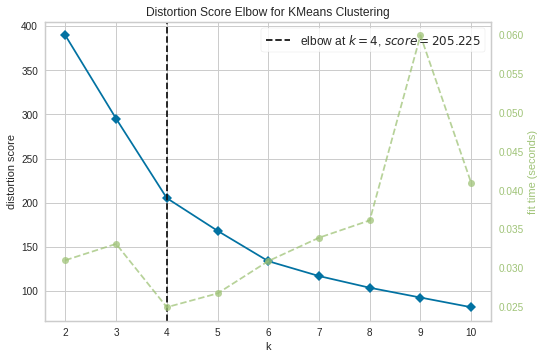

In [ ]:
model = KMeans(random_state=9999)
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(df_s)
visualizer.show()
plt.show()

Scaling 후: 최적 K=4

###Silhouette Coefficient
군집 안의 데이터가 자신이 속한 군집 안의 다른 데이터와 얼마나 유사하며, 다른 군집에 속한
데이터와 얼마나 차이가 나는지 측정\
1에 가까울수록 적절


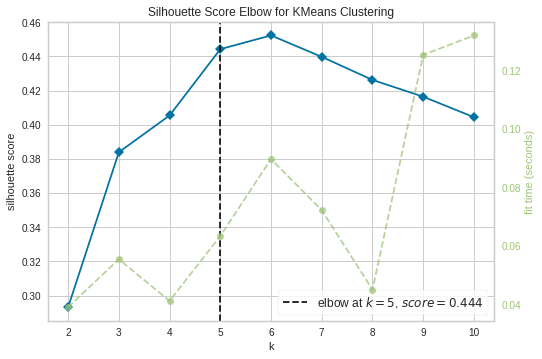

In [ ]:
model = KMeans(random_state=9999)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette')

visualizer.fit(df_a.values)
visualizer.show()
plt.show()

K=6일때가 가장 실루엣 계수가 높지만, 알고리즘은 K=5를 추천.\
실루엣 계수가 가장 높은 것이 무조건 최적은 아님. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화가 아니기 때문.

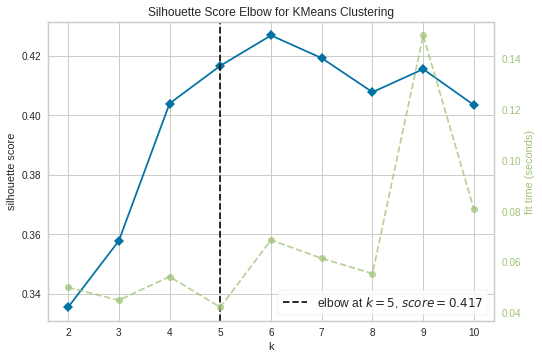

In [ ]:
model = KMeans(random_state=9999)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette')

visualizer.fit(df_s.values)
visualizer.show()
plt.show()

Scaling 후: 전과 마찬가지로 K=5 추천

**WSS와 실루엣 계수를 종합적으로 판단한 결과, Scaling 전 데이터로 K=5일 때가 최적**

In [ ]:
kms = KMeans(n_clusters=5, random_state=9999)
k=df_a.copy()
kms.fit(k)
k['Cluster']=kms.labels_

In [ ]:
t0 = tracer(k, 0, 'Cluster 0')
t1 = tracer(k, 1, 'Cluster 1')
t2 = tracer(k, 2, 'Cluster 2')
t3 = tracer(k, 3, 'Cluster 3')
t4 = tracer(k, 4, 'Cluster 4')

dt = [t0, t1, t2, t3, t4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=dt, layout=layout)
py.offline.iplot(fig)

##DBSCAN

거리 eps 내에 데이터가 min_samples개 이상 있으면 하나의 cluster라고 인식\
이때, 실루엣 스코어로 최적의 eps를 구하고자 함

In [ ]:
def dbscan_sil(d):
  result = []

  for j in range(2, 7): # min_samples 2부터 6까지
    for i in np.arange(0.1, 20, 0.1): # eps 0.1부터 19.9까지 0.1만큼 이동
      db = DBSCAN(eps = i, min_samples = j) 
      d_c=db.fit_predict(d)
      if len(set(d_c))>=2: # 실루엣 스코어는 2개 이상의 라벨을 필요로 함. array에서 set으로 변경시켜 unique한 값이 2개 이상일 경우에만 실루엣 스코어 산출
        result.append([j, i, silhouette_score(d, d_c)])

  result.sort(key=lambda x:(-x[2])) # 실루엣 스코어 기준으로 내림차순 정렬
  dbscan = DBSCAN(eps=result[0][1], min_samples=result[0][0]) # 가장 첫번째 값 = 가장 실루엣 스코어가 큰 값, 가장 실루엣 스코어 컸던 값으로 dbscan
  dbscan.fit(d)
  d['Cluster']=dbscan.labels_
  print(d.Cluster.unique()) # 군집 개수 print

In [ ]:
db=df_a.copy() # scaling 전 데이터
dbscan_sil(db) # 군집화 잘 되지 않았음. 소수의 잡음 외에는 모두 1개의 군집처리

[ 0 -1]


In [ ]:
dt0 = tracer(db, 0, 'Cluster 0')
dt1 = tracer(db, -1, 'Noise')

dt = [dt0, dt1]

layout = go.Layout(
    title = 'Clusters By DBSCAN Before Scaling',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=dt, layout=layout)
py.offline.iplot(fig)

In [ ]:
db_s=df_s.copy() # scaling 후 데이터
dbscan_sil(db_s) # 군집화 잘 되지 않았음. 소수의 잡음 외에는 모두 1개의 군집처리

[ 0 -1]


In [ ]:
dt0 = tracer(db_s, 0, 'Cluster 0')
dt1 = tracer(db_s, -1, 'Noise')

dt = [dt0, dt1]

layout = go.Layout(
    title = 'Clusters By DBSCAN After Scaling',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=dt, layout=layout)
py.offline.iplot(fig)

부분적으로 비슷한 밀도를 가진 데이터셋의 경우 DBSCAN은 좋지 않다.